In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
df = pd.read_csv('titanic.csv')

In [19]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [20]:
df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [21]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [22]:
sex_mapping = {'male':0, 'female':1}
df['Sex'] = df['Sex'].map(sex_mapping)

In [23]:
set(list(df['Embarked']))

{'C', 'Q', 'S', nan}

In [24]:
embarked_mapping = {'C':0, 'Q':1, 'S':2}
df['Embarked'] = df['Embarked'].map(embarked_mapping)

In [25]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
df['Age'] = df['Age'].fillna(df['Age'].mean())

In [26]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.000000,1,0,7.2500,2.0
1,1,1,1,38.000000,1,0,71.2833,0.0
2,1,3,1,26.000000,0,0,7.9250,2.0
3,1,1,1,35.000000,1,0,53.1000,2.0
4,0,3,0,35.000000,0,0,8.0500,2.0
...,...,...,...,...,...,...,...,...
886,0,2,0,27.000000,0,0,13.0000,2.0
887,1,1,1,19.000000,0,0,30.0000,2.0
888,0,3,1,29.699118,1,2,23.4500,2.0
889,1,1,0,26.000000,0,0,30.0000,0.0


In [27]:
X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values

In [74]:
X

array([[ 3.        ,  0.        , 22.        , ...,  0.        ,
         7.25      ,  2.        ],
       [ 1.        ,  1.        , 38.        , ...,  0.        ,
        71.2833    ,  0.        ],
       [ 3.        ,  1.        , 26.        , ...,  0.        ,
         7.925     ,  2.        ],
       ...,
       [ 3.        ,  1.        , 29.69911765, ...,  2.        ,
        23.45      ,  2.        ],
       [ 1.        ,  0.        , 26.        , ...,  0.        ,
        30.        ,  0.        ],
       [ 3.        ,  0.        , 32.        , ...,  0.        ,
         7.75      ,  1.        ]])

In [75]:
y

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [31]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [32]:
from sklearn.decomposition import PCA

In [34]:
pca = PCA(n_components=2)

In [35]:
pca.fit(X_train)

PCA(n_components=2)

In [36]:
print(pca.explained_variance_)

[1.8738123 1.689131 ]


In [38]:
PCscore = pca.transform(X_train)
PCscore.shape

(712, 2)

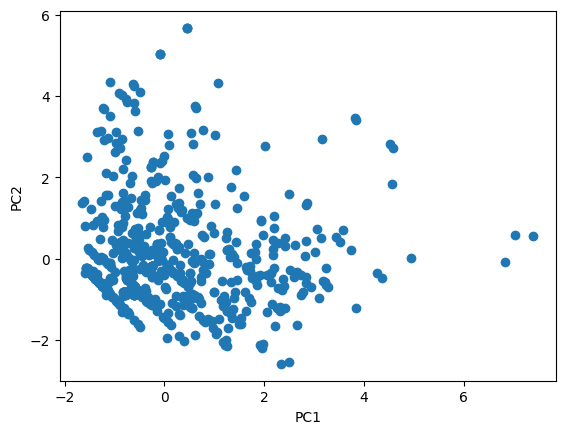

In [39]:
plt.scatter(PCscore[:, 0], PCscore[:, 1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [50]:
X1 = df.iloc[:, 2:4].values
y = df.iloc[:, 0].values

In [51]:
X1

array([[ 0.        , 22.        ],
       [ 1.        , 38.        ],
       [ 1.        , 26.        ],
       ...,
       [ 1.        , 29.69911765],
       [ 0.        , 26.        ],
       [ 0.        , 32.        ]])

In [52]:
y

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,

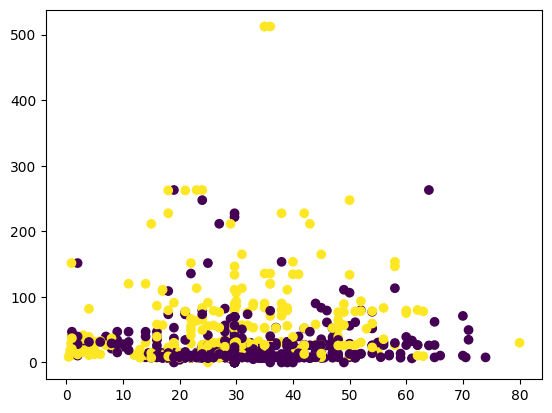

In [73]:
plt.scatter(X[:, 2], X[:, 5], c=y)
plt.show()

In [76]:
from sklearn.cluster import KMeans

In [77]:
kmeans = KMeans(n_clusters=2, random_state=2024)

In [78]:
kmeans.fit(X)

KMeans(n_clusters=2, random_state=2024)

In [79]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,

In [80]:
y_pred = kmeans.labels_

Text(0.5, 1.0, 'Predicted')

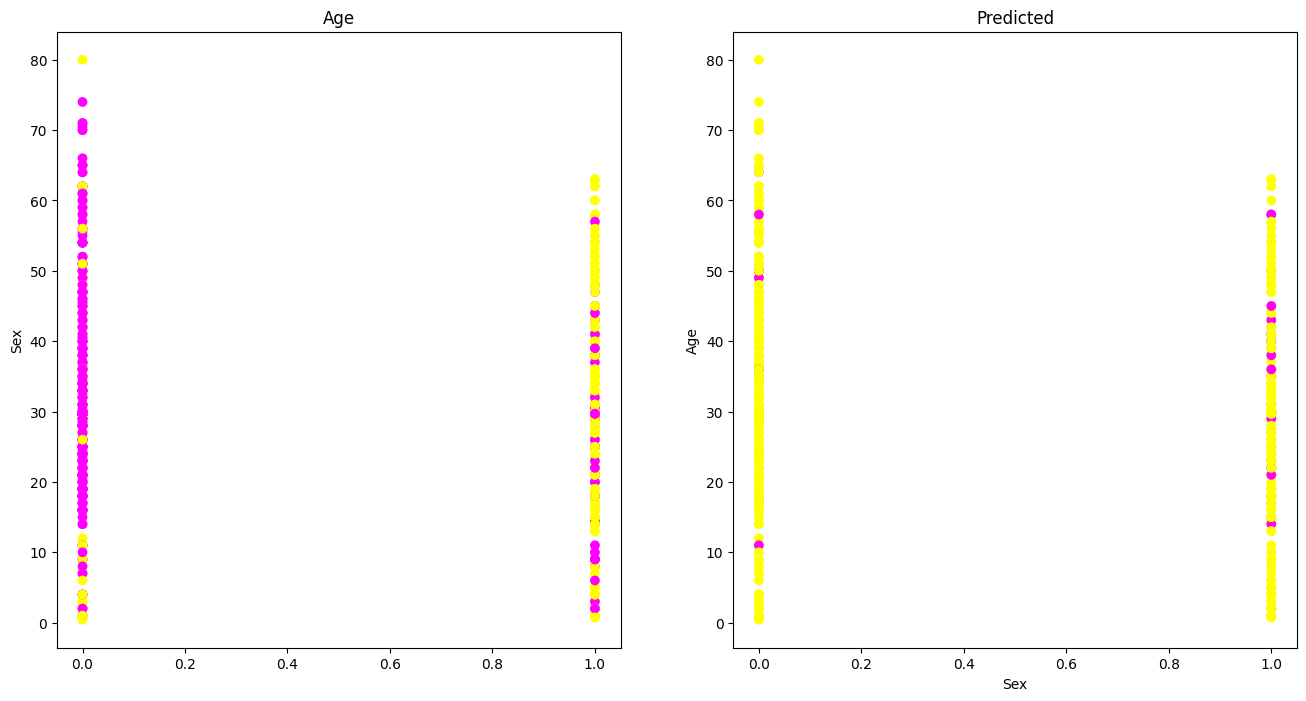

In [81]:
fig, axes = plt.subplots(1, 2, figsize=(16, 8))
axes[0].scatter(X1[:, 0], X1[:, 1], c=y, cmap='spring')
axes[0].set_xlabel('')
axes[0].set_ylabel('Sex')
axes[0].set_title('Age')
axes[1].scatter(X1[:, 0], X1[:, 1], c=y_pred, cmap='spring')
axes[1].set_xlabel('Sex')
axes[1].set_ylabel('Age')
axes[1].set_title('Predicted')

In [60]:
from sklearn.metrics.cluster import homogeneity_score, completeness_score, v_measure_score
from sklearn import metrics

In [62]:
print('homogeneity with 2 clusters by K means clustering', homogeneity_score(y, y_pred))
print('completeness with 2 clusters by K means clustering', completeness_score(y, y_pred))
print('v measure score with 2 clusters by K means clustering', v_measure_score(y, y_pred))
print('silhouette score with 2 clusters by K means clustering', metrics.silhouette_score(X, y_pred))

homogeneity with 2 clusters by K means clustering 0.024284031333696318
completeness with 2 clusters by K means clustering 0.07169768948203
v measure score with 2 clusters by K means clustering 0.03628001088411347
silhouette score with 2 clusters by K means clustering 0.7912765371451224


In [67]:
kmeans2 = KMeans(n_clusters=3, random_state=2024)
kmeans2.fit(X)

KMeans(n_clusters=3, random_state=2024)

In [69]:
y_pred2 = kmeans2.labels_
print('homogeneity with 3 clusters by K means clustering', homogeneity_score(y, y_pred2))
print('completeness with 3 clusters by K means clustering', completeness_score(y, y_pred2))
print('v measure score with 3 clusters by K means clustering', v_measure_score(y, y_pred2))
print('silhouette score with 3 clusters by K means clustering', metrics.silhouette_score(X, y_pred2))

homogeneity with 3 clusters by K means clustering 0.05760991515668085
completeness with 3 clusters by K means clustering 0.07076828262623966
v measure score with 3 clusters by K means clustering 0.06351475294544255
silhouette score with 3 clusters by K means clustering 0.6618125132662972


In [70]:
kmeans3 = KMeans(n_clusters=4, random_state=2024)
kmeans3.fit(X)
y_pred3 = kmeans3.labels_
print('homogeneity with 4 clusters by K means clustering', homogeneity_score(y, y_pred3))
print('completeness with 4 clusters by K means clustering', completeness_score(y, y_pred3))
print('v measure score with 4 clusters by K means clustering', v_measure_score(y, y_pred3))
print('silhouette score with 4 clusters by K means clustering', metrics.silhouette_score(X, y_pred3))

homogeneity with 4 clusters by K means clustering 0.05484237889103934
completeness with 4 clusters by K means clustering 0.06062109033442048
v measure score with 4 clusters by K means clustering 0.05758712824428337
silhouette score with 4 clusters by K means clustering 0.6353610618015538
